In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


## S Parking Spaces (By Location) (La Jolla Campus)

In [137]:
df_La_Jolla_S = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/La_Jolla_Campus__S_Parking_Spaces.csv")

In [138]:
assert isinstance(df_La_Jolla_S, pd.DataFrame)

In [139]:
df_La_Jolla_S.head()

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,6474.0,4882.0,4507.0,4149.0,3929.0,4041.0,4104.0,4149.0,4236.0,4387.0,4642.0,3929.0,2545.0,0.39
1,2000/01,Fall,6527.0,3713.0,2842.0,1815.0,1165.0,989.0,935.0,1024.0,1377.0,1738.0,2422.0,935.0,5592.0,0.86
2,2000/01,Winter,7203.0,4196.0,3280.0,2466.0,1881.0,1675.0,1588.0,1622.0,1931.0,2363.0,3060.0,1588.0,5615.0,0.78
3,2000/01,Spring,7205.0,4267.0,3306.0,2570.0,1962.0,1714.0,1636.0,1712.0,2003.0,2354.0,2980.0,1636.0,5569.0,0.77
4,2001/02,Summer,7243.0,5646.0,5228.0,4789.0,4533.0,4603.0,4689.0,4693.0,4751.0,4839.0,5054.0,4533.0,2710.0,0.37


In [140]:
df_La_Jolla_S_new = df_La_Jolla_S.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

df_La_Jolla_S_new

,year,quarter,parking_spaces,peak_empty_spaces,peak_occupied_spaces,%_occupied,Time of the day,Empty Spots
0,2000/01,Summer,6474.0,3929.0,2545.0,0.39,8am,4882.0
1,2000/01,Fall,6527.0,935.0,5592.0,0.86,8am,3713.0
2,2000/01,Winter,7203.0,1588.0,5615.0,0.78,8am,4196.0
3,2000/01,Spring,7205.0,1636.0,5569.0,0.77,8am,4267.0
4,2001/02,Summer,7243.0,4533.0,2710.0,0.37,8am,5646.0
5,2001/02,Fall,7043.0,1241.0,5802.0,0.82,8am,4240.0
6,2001/02,Winter,7151.0,1075.0,6076.0,0.85,8am,4266.0
7,2001/02,Spring,7150.0,1171.0,5979.0,0.84,8am,4222.0
8,2002/03,Summer,7044.0,3585.0,3459.0,0.49,8am,4752.0
9,2002/03,Fall,7024.0,990.0,6034.0,0.86,8am,4231.0


In [174]:
df_La_Jolla_S_new_2000 = df_La_Jolla_S_new[df_La_Jolla_S_new.year == '2000/01']
df_La_Jolla_S_new_2000["Empty Spots"].mean()

2740.3

In [142]:
df_La_Jolla_S_new_2015 = df_La_Jolla_S_new[df_La_Jolla_S_new.year == '2009/10']
df_La_Jolla_S_new_2015["Empty Spots"].mean()

2300.15

In [143]:
df_La_Jolla_S_new_2014 = df_La_Jolla_S_new[df_La_Jolla_S_new.year == '2014/15']
df_La_Jolla_S_new_2014["Empty Spots"].mean()

1449.95

### Average Empty spots for Time of the day (S-spot)

In [144]:
df_La_Jolla_S_new = df_La_Jolla_S_new.rename(columns={"Time of the day": "Time"})

df_La_Jolla_S_new_8am = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '8am']
x1 = df_La_Jolla_S_new_8am["Empty Spots"].mean()
df_La_Jolla_S_new_9am = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '9am']
x2 = df_La_Jolla_S_new_9am["Empty Spots"].mean()
df_La_Jolla_S_new_10am = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '10am']
x3 = df_La_Jolla_S_new_10am["Empty Spots"].mean()
df_La_Jolla_S_new_11am = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '11am']
x4 = df_La_Jolla_S_new_11am["Empty Spots"].mean()
df_La_Jolla_S_new_12am = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '12am']
x5 = df_La_Jolla_S_new_12am["Empty Spots"].mean()
df_La_Jolla_S_new_1pm = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '1pm']
x6 = df_La_Jolla_S_new_1pm["Empty Spots"].mean()
df_La_Jolla_S_new_2pm = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '2pm']
x7 = df_La_Jolla_S_new_2pm["Empty Spots"].mean()
df_La_Jolla_S_new_3pm = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '3pm']
x8 = df_La_Jolla_S_new_3pm["Empty Spots"].mean()
df_La_Jolla_S_new_4pm = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '4pm']
x9 = df_La_Jolla_S_new_4pm["Empty Spots"].mean()
df_La_Jolla_S_new_5pm = df_La_Jolla_S_new[df_La_Jolla_S_new.Time == '5pm']
x10 = df_La_Jolla_S_new_5pm["Empty Spots"].mean()

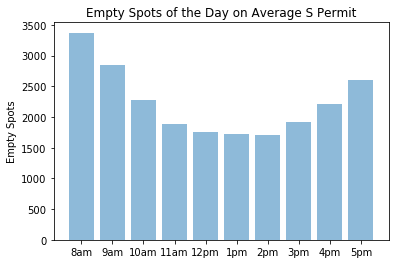

In [145]:
Times = ('8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm')
y_pos = np.arange(len(Times))
performance = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, Times)
plt.ylabel('Empty Spots')
plt.title('Empty Spots of the Day on Average S Permit')

plt.show()

## Max and Min Empty Spots for S parking permit

In [73]:
df_La_Jolla_S_new.loc[df_La_Jolla_S_new['Empty Spots'].idxmax()]

year                    2001/02
quarter                  Summer
parking_spaces             7243
peak_empty_spaces          4533
peak_occupied_spaces       2710
%_occupied                 0.37
Time of the day             8am
Empty Spots                5646
Name: 4, dtype: object

In [74]:
df_La_Jolla_S_new.loc[df_La_Jolla_S_new['Empty Spots'].idxmin()]

year                    2014/15
quarter                    Fall
parking_spaces             4648
peak_empty_spaces           593
peak_occupied_spaces       4055
%_occupied                 0.87
Time of the day             2pm
Empty Spots                 593
Name: 417, dtype: object

## A Parking Spaces (By Location) (La Jolla Campus)

In [146]:
df_La_Jolla_A = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/La_Jolla_Campus__A_Parking_Spaces.csv")

In [147]:
df_La_Jolla_A.head()

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,1616.0,1207.0,950.0,675.0,526.0,505.0,534.0,545.0,564.0,643.0,794.0,505.0,1111.0,0.69
1,2000/01,Fall,1691.0,1198.0,850.0,512.0,330.0,281.0,296.0,282.0,328.0,435.0,540.0,281.0,1410.0,0.83
2,2000/01,Winter,1735.0,1236.0,880.0,571.0,390.0,351.0,336.0,332.0,361.0,464.0,559.0,332.0,1403.0,0.81
3,2000/01,Spring,1731.0,1243.0,887.0,586.0,435.0,367.0,357.0,356.0,398.0,485.0,589.0,356.0,1375.0,0.79
4,2001/02,Summer,1677.0,1281.0,993.0,760.0,599.0,583.0,610.0,611.0,645.0,709.0,828.0,583.0,1094.0,0.65


In [148]:
df_La_Jolla_A_new = df_La_Jolla_A.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

In [149]:
df_La_Jolla_A_new.loc[df_La_Jolla_A_new['Empty Spots'].idxmax()]

year                    2011/12
quarter                  Summer
parking_spaces             2026
peak_empty_spaces           599
peak_occupied_spaces       1427
%_occupied                  0.7
Time of the day             8am
Empty Spots                1567
Name: 44, dtype: object

In [150]:
df_La_Jolla_A_new.loc[df_La_Jolla_A_new['Empty Spots'].idxmin()]

year                    2014/15
quarter                  Winter
parking_spaces             1947
peak_empty_spaces            97
peak_occupied_spaces       1850
%_occupied                 0.95
Time of the day            12am
Empty Spots                  97
Name: 298, dtype: object

In [178]:
df_La_Jolla_A_2000 = df_La_Jolla_A_new[df_La_Jolla_A_new.year == '2000/01']
#df_La_Jolla_A_2000
df_La_Jolla_A_2000["Empty Spots"].mean()

579.45

In [152]:
df_La_Jolla_A_2009 = df_La_Jolla_A_new[df_La_Jolla_A_new.year == '2009/10']
df_La_Jolla_A_2009["Empty Spots"].mean()

499.925

In [153]:
df_La_Jolla_A_2015 = df_La_Jolla_A_new[df_La_Jolla_A_new.year == '2014/15']
df_La_Jolla_A_2015["Empty Spots"].mean()

502.5

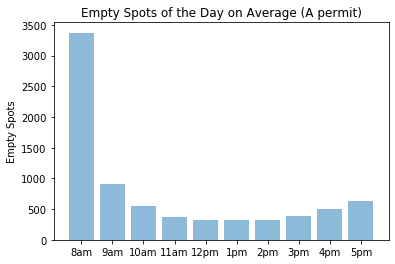

In [154]:
df_La_Jolla_A_new = df_La_Jolla_A.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

df_La_Jolla_A_new = df_La_Jolla_A_new.rename(columns={"Time of the day": "Time"})


df_La_Jolla_A_new_8am = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '8am']
x1 = df_La_Jolla_S_new_8am["Empty Spots"].mean()
df_La_Jolla_A_new_9am = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '9am']
x2 = df_La_Jolla_A_new_9am["Empty Spots"].mean()
df_La_Jolla_A_new_10am = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '10am']
x3 = df_La_Jolla_A_new_10am["Empty Spots"].mean()
df_La_Jolla_A_new_11am = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '11am']
x4 = df_La_Jolla_A_new_11am["Empty Spots"].mean()
df_La_Jolla_A_new_12am = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '12am']
x5 = df_La_Jolla_A_new_12am["Empty Spots"].mean()
df_La_Jolla_A_new_1pm = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '1pm']
x6 = df_La_Jolla_A_new_1pm["Empty Spots"].mean()
df_La_Jolla_A_new_2pm = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '2pm']
x7 = df_La_Jolla_A_new_2pm["Empty Spots"].mean()
df_La_Jolla_A_new_3pm = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '3pm']
x8 = df_La_Jolla_A_new_3pm["Empty Spots"].mean()
df_La_Jolla_A_new_4pm = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '4pm']
x9 = df_La_Jolla_A_new_4pm["Empty Spots"].mean()
df_La_Jolla_A_new_5pm = df_La_Jolla_A_new[df_La_Jolla_A_new.Time == '5pm']
x10 = df_La_Jolla_A_new_5pm["Empty Spots"].mean()

Times = ('8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm')
y_pos = np.arange(len(Times))
performance = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, Times)
plt.ylabel('Empty Spots')
plt.title('Empty Spots of the Day on Average (A permit)')

plt.show()

## A Parking Spaces (By Location) (Medical Center Hillcrest)

In [36]:
df_Medical_Center_Hillcrest_A = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/Medical_Center_Hillcrest__A_Parking_Spaces.csv")

In [37]:
df_Medical_Center_Hillcrest_A.head()

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,240.0,118.0,93.0,70.0,56.0,59.0,71.0,64.0,62.0,62.0,82.0,56.0,184.0,0.77
1,2000/01,Fall,239.0,117.0,94.0,72.0,55.0,52.0,55.0,50.0,53.0,55.0,72.0,50.0,189.0,0.79
2,2000/01,Winter,232.0,102.0,78.0,47.0,38.0,31.0,37.0,38.0,38.0,53.0,81.0,31.0,201.0,0.87
3,2000/01,Spring,232.0,113.0,84.0,59.0,42.0,41.0,46.0,41.0,43.0,47.0,69.0,41.0,191.0,0.82
4,2001/02,Summer,237.0,110.0,83.0,57.0,47.0,36.0,48.0,41.0,34.0,52.0,71.0,34.0,203.0,0.86


In [ ]:
df_Medical_Center_Hillcrest_A_new = df_Medical_Center_Hillcrest_A.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

In [39]:
df_Medical_Center_Hillcrest_A_new.loc[df_Medical_Center_Hillcrest_A_new['Empty Spots'].idxmax()]

year                    2013/14
quarter                  Spring
parking_spaces              266
peak_empty_spaces            67
peak_occupied_spaces        199
%_occupied                 0.75
Time of the day             8am
Empty Spots                 171
Name: 55, dtype: object

In [40]:
df_Medical_Center_Hillcrest_A_new.loc[df_Medical_Center_Hillcrest_A_new['Empty Spots'].idxmin()]

year                    2003/04
quarter                    Fall
parking_spaces              243
peak_empty_spaces             7
peak_occupied_spaces        236
%_occupied                 0.97
Time of the day            11am
Empty Spots                   7
Name: 193, dtype: object

## B Parking Spaces (By Location) (La Jolla campus)

In [181]:
df_La_Jolla_B = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/La_Jolla_Campus__B_Parking_Spaces.csv")
df_La_Jolla_B.head() 

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,3442.0,1749.0,1134.0,797.0,616.0,683.0,720.0,720.0,803.0,1086.0,1659.0,616.0,2826.0,0.82
1,2000/01,Fall,3517.0,1622.0,898.0,458.0,323.0,342.0,386.0,366.0,454.0,712.0,1331.0,323.0,3194.0,0.91
2,2000/01,Winter,3905.0,1921.0,1137.0,698.0,532.0,563.0,573.0,563.0,673.0,996.0,1621.0,532.0,3373.0,0.86
3,2000/01,Spring,3905.0,2034.0,1220.0,781.0,577.0,607.0,644.0,606.0,709.0,998.0,1527.0,577.0,3328.0,0.85
4,2001/02,Summer,3872.0,2276.0,1615.0,1209.0,988.0,1011.0,1061.0,1056.0,1159.0,1440.0,2031.0,988.0,2884.0,0.74


In [182]:
df_La_Jolla_B_new = df_La_Jolla_campus_B.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

In [183]:
df_La_Jolla_B_new.loc[df_La_Jolla_campus_B_new['Empty Spots'].idxmax()]

year                    2008/09
quarter                  Summer
parking_spaces             5014
peak_empty_spaces          1319
peak_occupied_spaces       3695
%_occupied                 0.74
Time of the day             8am
Empty Spots                3301
Name: 32, dtype: object

In [184]:
df_La_Jolla_B_new.loc[df_La_Jolla_campus_B_new['Empty Spots'].idxmin()]

year                    2014/15
quarter                  Winter
parking_spaces             4932
peak_empty_spaces           151
peak_occupied_spaces       4781
%_occupied                 0.97
Time of the day            12am
Empty Spots                 151
Name: 298, dtype: object

In [185]:
df_La_Jolla_B_2000 = df_La_Jolla_B_new[df_La_Jolla_B_new.year == '2000/01']
df_La_Jolla_B_2000["Empty Spots"].mean()

895.975

In [186]:
df_La_Jolla_B_2009 = df_La_Jolla_B_new[df_La_Jolla_B_new.year == '2009/10']
df_La_Jolla_B_2009["Empty Spots"].mean()

1243.4

In [187]:
df_La_Jolla_B_2014 = df_La_Jolla_B_new[df_La_Jolla_B_new.year == '2014/15']
df_La_Jolla_B_2014["Empty Spots"].mean()

1002.9

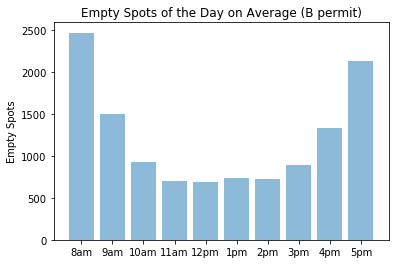

In [190]:
df_La_Jolla_B_new = df_La_Jolla_B_new.rename(columns={"Time of the day": "Time"})

df_La_Jolla_B_new_8am = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '8am']
x1 = df_La_Jolla_B_new_8am["Empty Spots"].mean()
df_La_Jolla_B_new_9am = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '9am']
x2 = df_La_Jolla_B_new_9am["Empty Spots"].mean()
df_La_Jolla_B_new_10am = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '10am']
x3 = df_La_Jolla_B_new_10am["Empty Spots"].mean()
df_La_Jolla_B_new_11am = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '11am']
x4 = df_La_Jolla_B_new_11am["Empty Spots"].mean()
df_La_Jolla_B_new_12am = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '12am']
x5 = df_La_Jolla_B_new_12am["Empty Spots"].mean()
df_La_Jolla_B_new_1pm = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '1pm']
x6 = df_La_Jolla_B_new_1pm["Empty Spots"].mean()
df_La_Jolla_B_new_2pm = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '2pm']
x7 = df_La_Jolla_B_new_2pm["Empty Spots"].mean()
df_La_Jolla_B_new_3pm = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '3pm']
x8 = df_La_Jolla_B_new_3pm["Empty Spots"].mean()
df_La_Jolla_B_new_4pm = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '4pm']
x9 = df_La_Jolla_B_new_4pm["Empty Spots"].mean()
df_La_Jolla_B_new_5pm = df_La_Jolla_B_new[df_La_Jolla_B_new.Time == '5pm']
x10 = df_La_Jolla_B_new_5pm["Empty Spots"].mean()

Times = ('8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm')
y_pos = np.arange(len(Times))
performance = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, Times)
plt.ylabel('Empty Spots')
plt.title('Empty Spots of the Day on Average (B permit)')

plt.show()

## B Parking Spaces (By Location) (Medical Center Hillcrest)

In [80]:
df_Medical_Center_Hillcrest_B = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/Medical_Center_Hillcrest__B_Parking_Spaces.csv")
df_Medical_Center_Hillcrest_B.head()

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,1137.0,278.0,164.0,97.0,68.0,89.0,104.0,111.0,114.0,214.0,394.0,68.0,1069.0,0.94
1,2000/01,Fall,1137.0,303.0,165.0,76.0,63.0,75.0,88.0,123.0,139.0,271.0,419.0,63.0,1074.0,0.94
2,2000/01,Winter,1167.0,294.0,146.0,82.0,57.0,62.0,78.0,94.0,138.0,277.0,444.0,57.0,1110.0,0.95
3,2000/01,Spring,1167.0,336.0,221.0,120.0,91.0,103.0,128.0,148.0,186.0,301.0,467.0,91.0,1076.0,0.92
4,2001/02,Summer,1167.0,318.0,191.0,119.0,91.0,99.0,125.0,139.0,164.0,291.0,461.0,91.0,1076.0,0.92


In [8]:
df_Medical_Center_Hillcrest_B_new = df_Medical_Center_Hillcrest_B.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

In [12]:
df_Medical_Center_Hillcrest_B_new.loc[df_Medical_Center_Hillcrest_B_new['Empty Spots'].idxmax()]

year                    2012/13
quarter                  Summer
parking_spaces             1198
peak_empty_spaces           120
peak_occupied_spaces       1078
%_occupied                  0.9
Time of the day             5pm
Empty Spots                 621
Name: 588, dtype: object

In [15]:
df_Medical_Center_Hillcrest_B_new.loc[df_Medical_Center_Hillcrest_B_new['Empty Spots'].idxmin()]

year                    2004/05
quarter                    Fall
parking_spaces             1136
peak_empty_spaces             0
peak_occupied_spaces       1136
%_occupied                    1
Time of the day            11am
Empty Spots                   0
Name: 197, dtype: object

## V Parking Spaces (By Location) (La Jolla Campus)

In [106]:
df_La_Jolla_V = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/La_Jolla_Campus__Visitor_Parking_Spaces.csv")
df_La_Jolla_V.head() 

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,572.0,370.0,275.0,194.0,162.0,158.0,176.0,202.0,207.0,235.0,243.0,158.0,414.0,0.72
1,2000/01,Fall,713.0,478.0,376.0,268.0,226.0,194.0,194.0,189.0,212.0,209.0,203.0,189.0,524.0,0.73
2,2000/01,Winter,717.0,463.0,334.0,236.0,185.0,184.0,198.0,200.0,200.0,234.0,216.0,184.0,533.0,0.74
3,2000/01,Spring,702.0,431.0,293.0,199.0,166.0,148.0,144.0,144.0,173.0,196.0,186.0,144.0,558.0,0.79
4,2001/02,Summer,697.0,512.0,423.0,330.0,273.0,278.0,286.0,288.0,314.0,349.0,347.0,273.0,424.0,0.61


In [107]:
df_La_Jolla_V_new = df_La_Jolla_campus_V.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

In [108]:
df_La_Jolla_V_new.loc[df_La_Jolla_V_new['Empty Spots'].idxmax()]

year                    2014/15
quarter                  Summer
parking_spaces             1503
peak_empty_spaces           352
peak_occupied_spaces       1151
%_occupied                 0.77
Time of the day             8am
Empty Spots                1071
Name: 56, dtype: object

In [109]:
df_La_Jolla_V_new.loc[df_La_Jolla_V_new['Empty Spots'].idxmin()]

year                    2007/08
quarter                  Winter
parking_spaces              490
peak_empty_spaces            61
peak_occupied_spaces        429
%_occupied                 0.88
Time of the day            12am
Empty Spots                  61
Name: 270, dtype: object

In [110]:
df_La_Jolla_V_2000 = df_La_Jolla_V_new[df_La_Jolla_V_new.year == '2000/01']
df_La_Jolla_V_2000["Empty Spots"].mean()

232.525

In [111]:
df_La_Jolla_V_2000 = df_La_Jolla_V_new[df_La_Jolla_V_new.year == '2009/10']
df_La_Jolla_V_2000["Empty Spots"].mean()

411.1

In [112]:
df_La_Jolla_V_2000 = df_La_Jolla_V_new[df_La_Jolla_V_new.year == '2014/15']
df_La_Jolla_V_2000["Empty Spots"].mean()

448.75

Text(0.5, 1.0, 'Empty Spots of the Day on Average (V permit)')

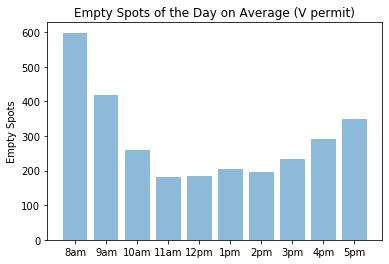

In [191]:
df_La_Jolla_V_new = df_La_Jolla_V_new.rename(columns={"Time of the day": "Time"})

df_La_Jolla_V_new_8am = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '8am']
x1 = df_La_Jolla_V_new_8am["Empty Spots"].mean()
df_La_Jolla_V_new_9am = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '9am']
x2 = df_La_Jolla_V_new_9am["Empty Spots"].mean()
df_La_Jolla_V_new_10am = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '10am']
x3 = df_La_Jolla_V_new_10am["Empty Spots"].mean()
df_La_Jolla_V_new_11am = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '11am']
x4 = df_La_Jolla_V_new_11am["Empty Spots"].mean()
df_La_Jolla_V_new_12am = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '12am']
x5 = df_La_Jolla_V_new_12am["Empty Spots"].mean()
df_La_Jolla_V_new_1pm = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '1pm']
x6 = df_La_Jolla_V_new_1pm["Empty Spots"].mean()
df_La_Jolla_V_new_2pm = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '2pm']
x7 = df_La_Jolla_V_new_2pm["Empty Spots"].mean()
df_La_Jolla_V_new_3pm = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '3pm']
x8 = df_La_Jolla_V_new_3pm["Empty Spots"].mean()
df_La_Jolla_V_new_4pm = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '4pm']
x9 = df_La_Jolla_V_new_4pm["Empty Spots"].mean()
df_La_Jolla_V_new_5pm = df_La_Jolla_V_new[df_La_Jolla_V_new.Time == '5pm']
x10 = df_La_Jolla_V_new_5pm["Empty Spots"].mean()

Times = ('8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm')
y_pos = np.arange(len(Times))
performance = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, Times)
plt.ylabel('Empty Spots')
plt.title('Empty Spots of the Day on Average (V permit)')

## V Parking Space (By Location) (Medical Center)

In [28]:
df_Medical_Center_Hillcrest_V = pd.read_csv("/home/ktantipa/ECE143_Final_Project_dev/csv_data/By-Location/Medical_Center_Hillcrest__Visitor_Parking_Spaces.csv")
df_Medical_Center_Hillcrest_V.head()

,year,quarter,parking_spaces,8am,9am,10am,11am,12am,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,9.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,3.0,0.0,9.0,1.0
1,2000/01,Fall,9.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,9.0,1.0
2,2000/01,Winter,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,9.0,1.0
3,2000/01,Spring,9.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,0.0,9.0,1.0
4,2001/02,Summer,9.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,9.0,1.0


In [29]:
df_Medical_Center_Hillcrest_V_new = df_Medical_Center_Hillcrest_V.melt(id_vars=["year", "quarter", "parking_spaces", "peak_empty_spaces", "peak_occupied_spaces", "%_occupied"], 
        var_name="Time of the day", 
        value_name="Empty Spots")

In [30]:
df_Medical_Center_Hillcrest_V_new.loc[df_Medical_Center_Hillcrest_V_new['Empty Spots'].idxmax()]

year                    2014/15
quarter                  Winter
parking_spaces              367
peak_empty_spaces           106
peak_occupied_spaces        261
%_occupied                 0.71
Time of the day             8am
Empty Spots                 279
Name: 58, dtype: object

In [ ]:
df_Medical_Center_Hillcrest_B_new.loc[df_Medical_Center_Hillcrest_V_new['Empty Spots'].idxmin()]

### Pi Chart

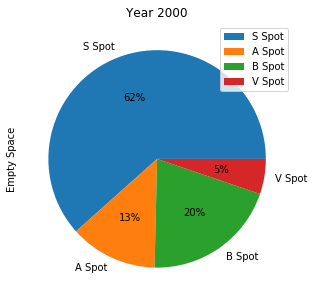

In [171]:
df = pd.DataFrame({'Empty Space': [2740.3, 579.45, 895.975, 232.525]},
                    index=['S Spot', 'A Spot', 'B Spot', 'V Spot'])

plot = df.plot.pie(title='Year 2000',y='Empty Space', autopct='%1.0f%%', figsize=(5, 5))

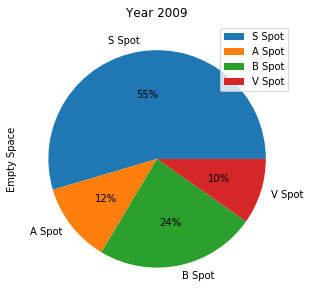

In [179]:
df = pd.DataFrame({'Empty Space': [2300.15, 499.925, 1002.9, 411.1]},
                    index=['S Spot', 'A Spot', 'B Spot', 'V Spot'])

plot = df.plot.pie(title='Year 2009',y='Empty Space', autopct='%1.0f%%', figsize=(5, 5))


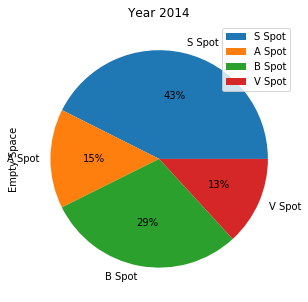

In [180]:
df = pd.DataFrame({'Empty Space': [1449.95, 502.5, 1002.9, 448.75]},
                    index=['S Spot', 'A Spot', 'B Spot', 'V Spot'])

plot = df.plot.pie(title='Year 2014',y='Empty Space', autopct='%1.0f%%', figsize=(5, 5))
